### Data Cleaning Challenge

**Tasks:**
<p style ="font-family:georgia,garamond,serif;font-size:16px;">
1. Straighten it out to a table of at least 7 columns.
<p style ="font-family:georgia,garamond,serif;font-size:16px;">    
2. Identify the top 5 predominant ages in the datasets.
<p style ="font-family:georgia,garamond,serif;font-size:16px;">
3. Determine the Bank with the largest share of transactions
<p style ="font-family:georgia,garamond,serif;font-size:16px;">
4. Show a distribution of channels used on transactions.
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd .read_excel(r'Killa.xlsx',sheet_name='Sheet1')

In [3]:
df.head()

,First Name,Last Name,transaction
0,nooeukw,uuoaklowalb,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
1,angulbo,seagn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
2,dukowi,eukloomja,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
3,ltuoawiob,uuilawobmn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
4,nakuolo,donald,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 3 columns):
First Name     127 non-null object
Last Name      127 non-null object
transaction    127 non-null object
dtypes: object(3)
memory usage: 3.1+ KB


<p style ="font-family:georgia,garamond,serif;font-size:16px;">
It's time to do some cleaning.
<p style ="font-family:georgia,garamond,serif;font-size:16px;">
First, let's check the transcation column. seems that's where we will be doing most of the cleaning.

In [5]:
df['transaction'][0]

"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-13T05:28:47.543000Z', 'tx_amount': 6192, 'tx_mode': 'Debit', 'tx_channel': 'web', 'bank_name': 'QBank', 'dob': ['1992-11-10 00:00:00']}"

<p style ="font-family:georgia,garamond,serif;font-size:16px;">
    Below, we want to convert the strings to dictionaries using the <b><i>literal_eval</i></b> method from the abstract syntax tree(AST).
</p>

In [6]:
from ast import literal_eval

In [7]:
df['transaction'] = df['transaction'].apply(literal_eval)
df['transaction']

0      {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
1      {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
2      {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
3      {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
4      {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
                             ...                        
122    {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
123    {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
124    {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
125    {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
126    {'tx_id': '5ed3d67b8723c11444c43283', 'tx_date...
Name: transaction, Length: 127, dtype: object

### Task 1: Straighten it out to a table of at least 7 columns


<p style ="font-family:georgia,garamond,serif;font-size:16px;">
The data format in the transaction column is a JSON object. let's import json_normalize method from pandas.io.json. This normalize seni-structured JSON data into a flat table.
    </p>

In [8]:
from pandas.io.json import json_normalize

In [9]:
transaction = json_normalize(df['transaction'])
transaction.head(2)

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[1992-11-10 00:00:00]
1,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]


In [10]:
# Dropping the transaction column from the main dataset
df.drop('transaction',axis=1, inplace=True)

In [11]:
# concatenating the transaction dataframe with the main dataframe
df = pd.concat([df,transaction],axis=1)

In [12]:
df.head(2)

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[1992-11-10 00:00:00]
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]


In [13]:
df['dob'][0]

['1992-11-10 00:00:00']

In [14]:
# This is to convert list to a pandas series using the apply method
df['dob'] = df['dob'].apply(pd.Series)

In [15]:
# Replace 'n/a' with Nan
df['dob'].replace('n/a',np.nan,inplace=True)

In [16]:
df['dob'].isnull().sum()

82

In [17]:
# Changing the data type to only date
df['dob'] = pd.to_datetime(df['dob']).dt.date

In [18]:
df['dob'][0]

datetime.date(1992, 11, 10)

In [19]:
# Number of null values
df['dob'].isnull().sum()

82

In [20]:
# changing the data type to only date
df['tx_date'] = pd.to_datetime(df['tx_date']).dt.date

In [21]:
df['tx_date'].unique()

array([datetime.date(2020, 6, 13), datetime.date(2020, 6, 12)],
      dtype=object)

In [22]:
# checking if there's any date greater than the transaction date
df['dob'] = df['dob'].where(df['dob']<df['tx_date'])

In [23]:
# getting the age by substracting the date of birth column from the transaction date column
df['age'] = (df['tx_date'] - df['dob']).astype('<m8[Y]')

In [24]:
df['age'].isnull().sum()

82

In [25]:
df.head(2)

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob,age
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13,6192,Debit,web,QBank,1992-11-10,27.0
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12,38445,Debit,mobile,ABank,NaN,NaN


### Task 2:  Identify the top 5 predominant ages in the datasets

In [26]:
top6_ages = df['age'].value_counts().head(5)
top6_ages

28.0    6
39.0    5
20.0    4
43.0    4
31.0    4
Name: age, dtype: int64

In [27]:
# creating a function that performs a countplot
def Plot_a_countplot(df, col, title):
    """
    Create a count plot from a value count on the column specified
    
    Args: 
        df= dataframe 
        col= name of column
        title = title desired
    
    """
    plt.figure(figsize=(8,6))
    data = df[col].value_counts().head(5)
    ax = sns.countplot(x=df[col],
                  order=data.index,
                  lw=1,
                  palette='cividis',
                  edgecolor='k'*df[col].nunique()
                  )
    for p in ax.patches:
        ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),
                ha='center',va='center',xytext=(0,10),textcoords='offset points',weight='bold')
    plt.title(title.title(),fontsize=16)
    plt.xticks(fontsize=12,weight='bold')
    plt.xlabel(col,fontsize=12,weight='bold')

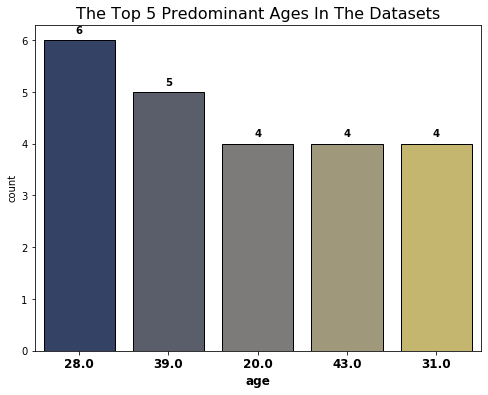

In [28]:
Plot_a_countplot(df,'age',"the top 5 predominant ages in the datasets")

### Task 3: Determine the Bank with the largest share of transactions

In [29]:
bank_transactions = df['bank_name'].value_counts()
bank_transactions

ABank    32
QBank    32
GBank    32
KBank    31
Name: bank_name, dtype: int64

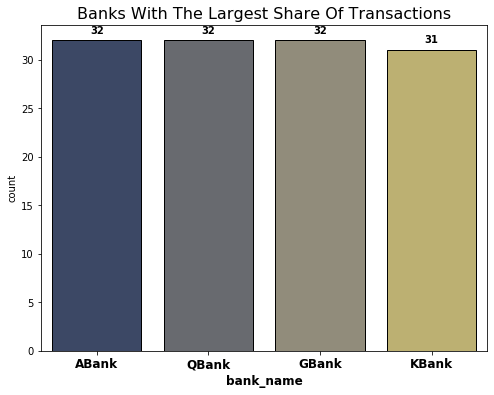

In [30]:
Plot_a_countplot(df,'bank_name',"Banks with the largest share of transactions")

### Task 4: Show a distribution of channels used on transactions.

Text(0.5, 1.0, 'Show a distribution of channels used on transactions')

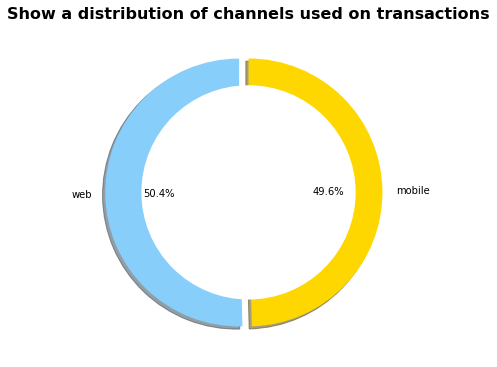

In [31]:
fig=plt.figure(figsize=(6,7))
sizes = df['tx_channel'].value_counts()
labels=['web','mobile']
color = ['lightskyblue','gold']
plt.pie(sizes,labels=labels,shadow=True,colors=color,autopct='%1.1f%%',
              startangle=90,radius=1,explode=[0.07,0])
circle = plt.Circle((0,0),0.8,fc='white')
plt.gca().add_artist(circle)
plt.title('Show a distribution of channels used on transactions',fontsize=16,weight='bold')

In [32]:
df.to_csv("new_killa.csv",index=False)

**Adebo Dolapo**


**26/10/2020**